# MESC analysis

In [30]:
setwd("..")
library(data.table)
library(tidyverse)
library(wesanderson)

In [2]:
all.gene <- read.table("out/all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)
all.gene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01102589,0.004399838,0.03154292,0.01245856
h2nonmed,0.33852597,0.014372453,0.96845708,0.01245856
h2,0.34955186,0.014462320,1.00000000,0.00000000


In [3]:
all.iso <- read.table("out/all.iso.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [4]:
all.intron <- read.table("out/all.intron.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [6]:
all.intron

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.007429701,0.006103173,0.02132463,0.01735272
h2nonmed,0.340979714,0.014472746,0.97867537,0.01735272
h2,0.348409415,0.014517302,1.00000000,0.00000000


In [7]:
df <- rbind(all.gene, all.iso, all.intron)
df$Category <- c(rep("Genes", 3), rep("Isoforms", 3), rep("Introns", 3))
df <- df %>% filter(Quantity == "h2med")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.011025886,0.004399838,0.03154292,0.01245856,Genes,2.531826,0.0056735073
h2med,0.022719218,0.006794974,0.06454355,0.01918199,Isoforms,3.364800,0.0003829957
h2med,0.007429701,0.006103173,0.02132463,0.01735272,Introns,1.228892,0.1095560635


In [8]:
signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.03154292 + 0.01245856 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06454355 + 0.01918199 + 0.002)

In [9]:
colors <- c("Genes" = "#648FFF", "Isoforms" = "#DC267F", "Introns" = "#FFB000")

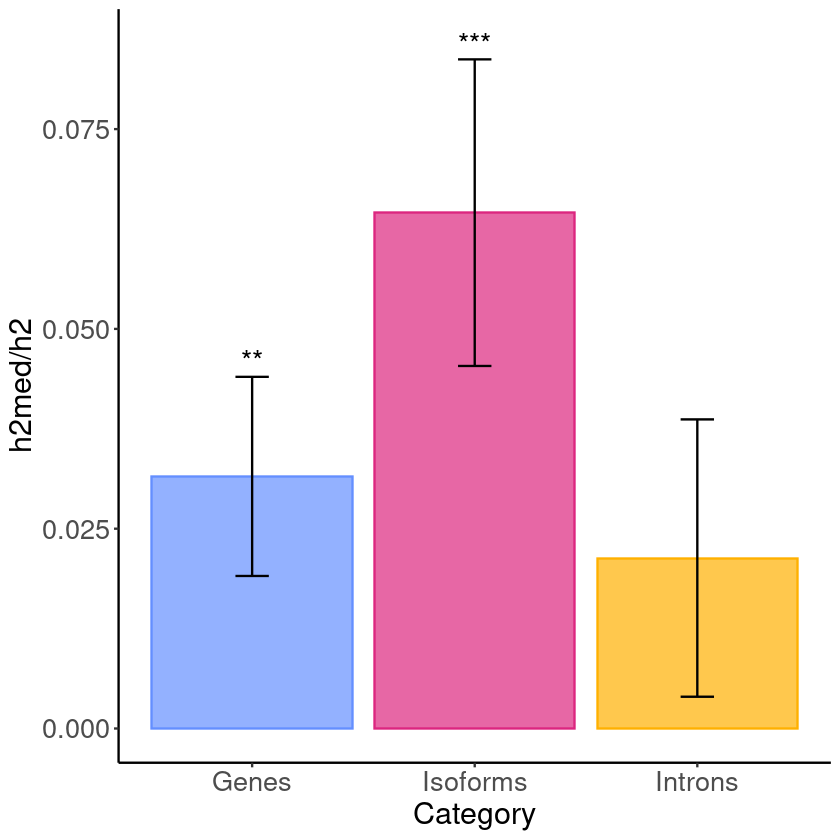

In [15]:
ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", aes(color = Category, fill = Category), alpha = 0.7) +
    scale_color_manual(values = colors) +
    scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = .15) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    geom_text(data = signif_gene, label = "**", size = 6) +
    geom_text(data = signif_iso, label = "***", size = 6)

In [16]:
ggsave("figures/mesc.pdf", height = 6, width = 6)

**More traits**

In [2]:
gene.results <- list.files(path = "out/", pattern = "^all.gene.*.all.h2med")
iso.results <- list.files(path = "out/", pattern = "^all.iso.*.all.h2med")
intron.results <- list.files(path = "out/", pattern = "^all.intron.*.all.h2med")

In [15]:
gene.results

[1] "all.gene.ADHD.Demontis.2019.all.h2med"                        
[2] "all.gene.ALZ.Jansen.2019.all.h2med"                           
[3] "all.gene.ASD.iPSYCHPGC.2018.all.h2med"                        
[4] "all.gene.EduYears.SSGAC.Lee2018.all.h2med"                    
[5] "all.gene.Insomnia.Jansen.2018.all.h2med"                      
[6] "all.gene.Intelligence.SavageNatGen.2018.all.h2med"            
[7] "all.gene.MDD.Howard.PGC.2019.all.h2med"                       
[8] "all.gene.pgc-bip2021-all.all.h2med"                           
[9] "all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med"

In [3]:
setwd("out")

In [4]:
for (i in 1:length(gene.results)) {
    file_name <- sub('all.gene.', '', gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.df <- gene.df %>% filter(Quantity == "h2med")
gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.df$Group <- "Genes"

In [5]:
for (i in 1:length(iso.results)) {
    file_name <- sub('all.iso.', '', iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
iso.df <- iso.df %>% filter(Quantity == "h2med")
iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
iso.df$Group <- "Isoforms"

In [6]:
for (i in 1:length(intron.results)) {
    file_name <- sub('all.intron.', '', intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
intron.df <- intron.df %>% filter(Quantity == "h2med")
intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
intron.df$Group <- "Introns"

In [7]:
df <- rbind(gene.df, iso.df, intron.df)
df$Group <- factor(df$Group, levels = c("Introns", "Isoforms", "Genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df

In [12]:
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [25]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

In [26]:
table(df$sig)


      *  ** *** 
 18   5   3   1 

In [21]:
# sig_05 <- df %>% filter(PVAL.est_over_h2 < 0.05, PVAL.est_over_h2 > 0.01)
# sig_01 <- df %>% filter(PVAL.est_over_h2 < 0.01, PVAL.est_over_h2 > 0.001)
# sig_001 <- df %>% filter(PVAL.est_over_h2 < 0.001)

# non_sig <- df %>% filter(FDR > 0.05) # need this to align geom_text position_dodge
# sig_05 <- df %>% filter(FDR < 0.05, FDR > 0.01)
# sig_01 <- df %>% filter(FDR < 0.01, FDR > 0.001)
# sig_001 <- df %>% filter(FDR < 0.001)

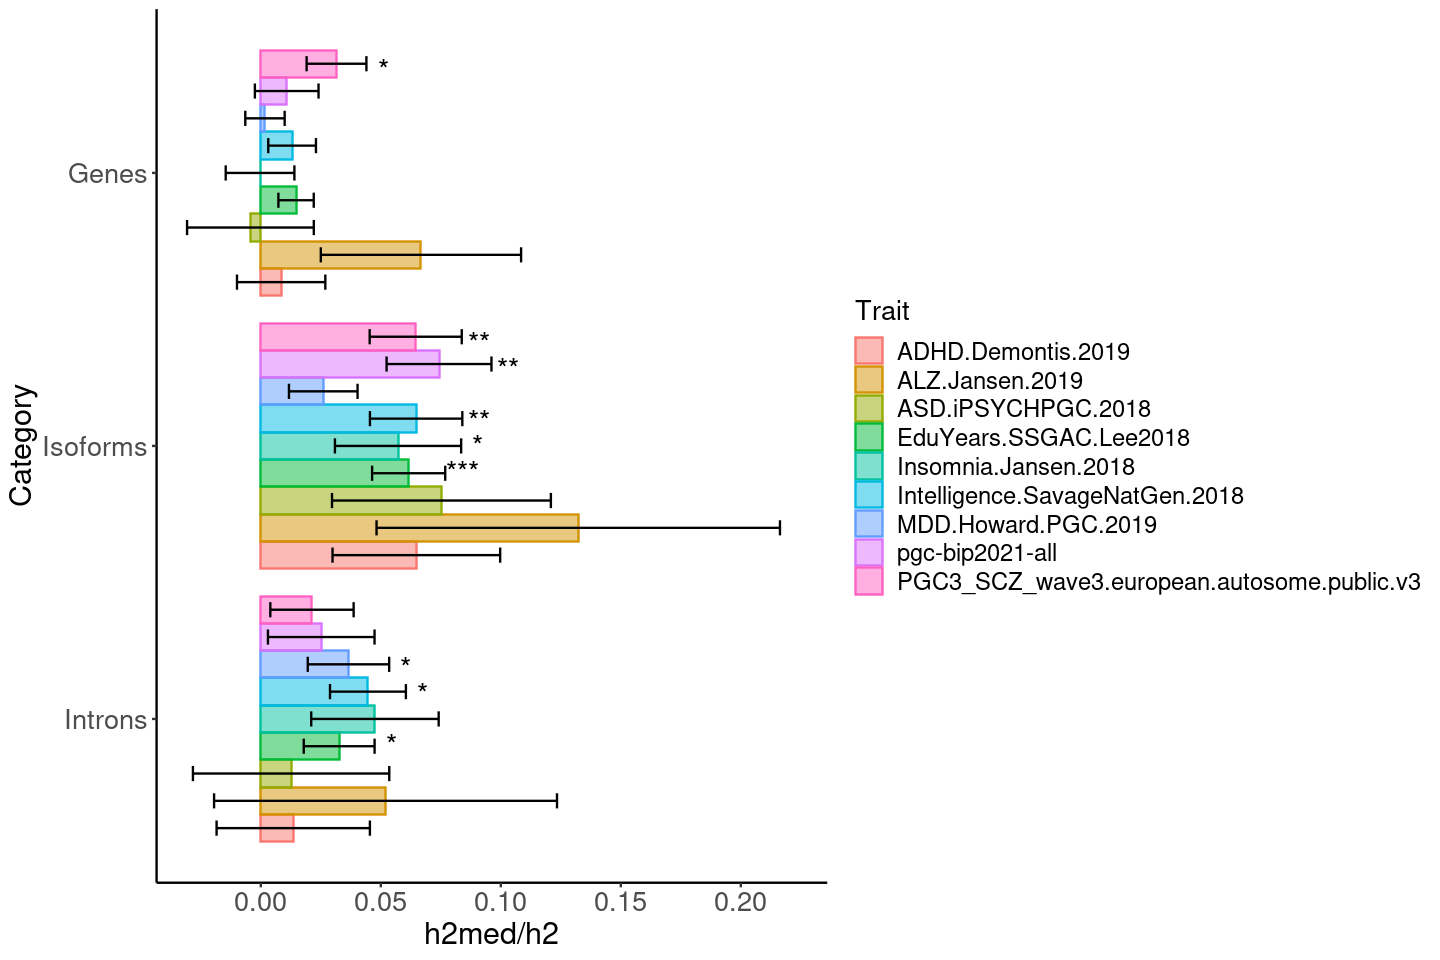

In [39]:
options(repr.plot.height = 8, repr.plot.width = 12)


ggplot(df, aes(y = Group, x = Estimate_over_h2, color = Trait, fill = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", alpha = 0.5, position = position_dodge(width = .9)) +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Category",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85))

In [41]:
ggsave("../figures/mesc1.pdf", height = 8, width = 12)

**Tile plot: tri gene/intron; sex gene; cell types gene**

In [2]:
tri1.gene.results <- list.files(path = "out/", pattern = "^tri1_25HCP.all.gene.*.all.h2med")
tri2.gene.results <- list.files(path = "out/", pattern = "^tri2_15HCP.all.gene.*.all.h2med")

In [5]:
male.gene.results <- list.files(path = "out/", pattern = "^m_50HCP.all.gene.*.all.h2med")
female.gene.results <- list.files(path = "out/", pattern = "^f_50HCP.all.gene.*.all.h2med")

In [7]:
female.gene.results

[1] "f_50HCP.all.gene.ADHD.Demontis.2019.all.h2med"                        
[2] "f_50HCP.all.gene.ALZ.Jansen.2019.all.h2med"                           
[3] "f_50HCP.all.gene.ASD.iPSYCHPGC.2018.all.h2med"                        
[4] "f_50HCP.all.gene.EduYears.SSGAC.Lee2018.all.h2med"                    
[5] "f_50HCP.all.gene.Insomnia.Jansen.2018.all.h2med"                      
[6] "f_50HCP.all.gene.Intelligence.SavageNatGen.2018.all.h2med"            
[7] "f_50HCP.all.gene.MDD.Howard.PGC.2019.all.h2med"                       
[8] "f_50HCP.all.gene.pgc-bip2021-all.all.h2med"                           
[9] "f_50HCP.all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med"

In [33]:
setwd("out")

In [14]:
for (i in 1:length(tri1.gene.results)) {
    file_name <- sub('tri1_25HCP.all.gene.', '', tri1.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.gene.df <- tri1.gene.df %>% filter(Quantity == "h2med")
tri1.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.gene.df$Group <- "Tri1 genes"

In [15]:
for (i in 1:length(tri2.gene.results)) {
    file_name <- sub('tri2_15HCP.all.gene.', '', tri2.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.gene.df <- tri2.gene.df %>% filter(Quantity == "h2med")
tri2.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.gene.df$Group <- "Tri2 genes"

In [17]:
for (i in 1:length(male.gene.results)) {
    file_name <- sub('m_50HCP.all.gene.', '', male.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(male.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

male.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
male.gene.df <- male.gene.df %>% filter(Quantity == "h2med")
male.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
male.gene.df$Group <- "Male genes"

In [18]:
for (i in 1:length(female.gene.results)) {
    file_name <- sub('f_50HCP.all.gene.', '', female.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(female.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

female.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
female.gene.df <- female.gene.df %>% filter(Quantity == "h2med")
female.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
female.gene.df$Group <- "Female genes"

In [19]:
df <- rbind(tri1.gene.df, tri2.gene.df, male.gene.df, female.gene.df)
df$Group <- factor(df$Group, levels = c("Tri1 genes", "Tri2 genes", "Male genes", "Female genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [25]:
df$sig_FDR <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig_FDR'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig_FDR'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig_FDR'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig_FDR'] <- '***'
    }
}

In [27]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'PVAL.est_over_h2'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'PVAL.est_over_h2'] < 0.05 & df[i,'PVAL.est_over_h2'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'PVAL.est_over_h2'] < 0.01 & df[i,'PVAL.est_over_h2'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'PVAL.est_over_h2'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

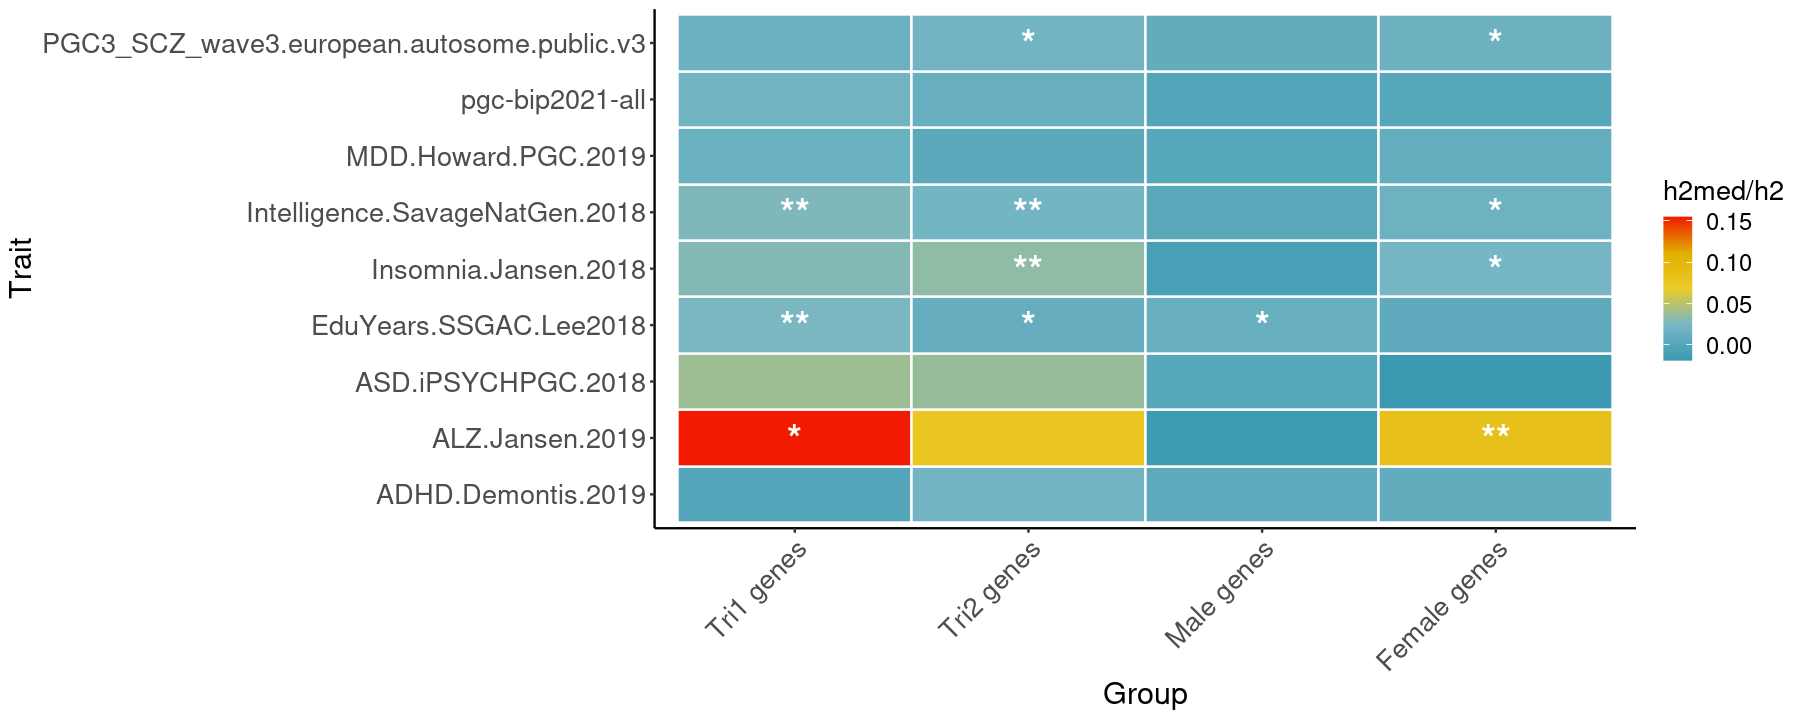

In [32]:
options(repr.plot.width = 15, repr.plot.height = 6)
pal <- wes_palette("Zissou1", 100, type = "continuous")

ggplot(df, aes(x = Group, y = Trait, fill = Estimate_over_h2)) +
    geom_tile(colour = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
          scale_fill_gradientn(colours = pal, name = "h2med/h2") +
    geom_text(aes(label = sig), color = "white", size = 8, fontface = "bold")

In [34]:
ggsave("../figures/mesc_temp.pdf", height = 6, width = 15)

In [5]:
tri1.gene <- read.table("out/tri1_25HCP.all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [6]:
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.011025886,0.004399838,0.03154292,0.01245856,Genes,2.531826,0.0056735073
h2med,0.022719218,0.006794974,0.06454355,0.01918199,Isoforms,3.364800,0.0003829957
h2med,0.007429701,0.006103173,0.02132463,0.01735272,Introns,1.228892,0.1095560635
h2med,0.005858637,0.004623295,0.01679390,0.01321569,Tri1 genes,1.270754,0.1019080115
h2med,0.007357525,0.003764827,0.02102321,0.01066013,Tri2 genes,1.972134,0.0242971389


In [7]:
signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.03154292 + 0.01245856 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06454355 + 0.01918199 + 0.002)
signif_tri2 <- data.frame("Category" = "Tri2 genes", "Estimate_over_h2" = 0.02102321 + 0.01066013 + 0.002)

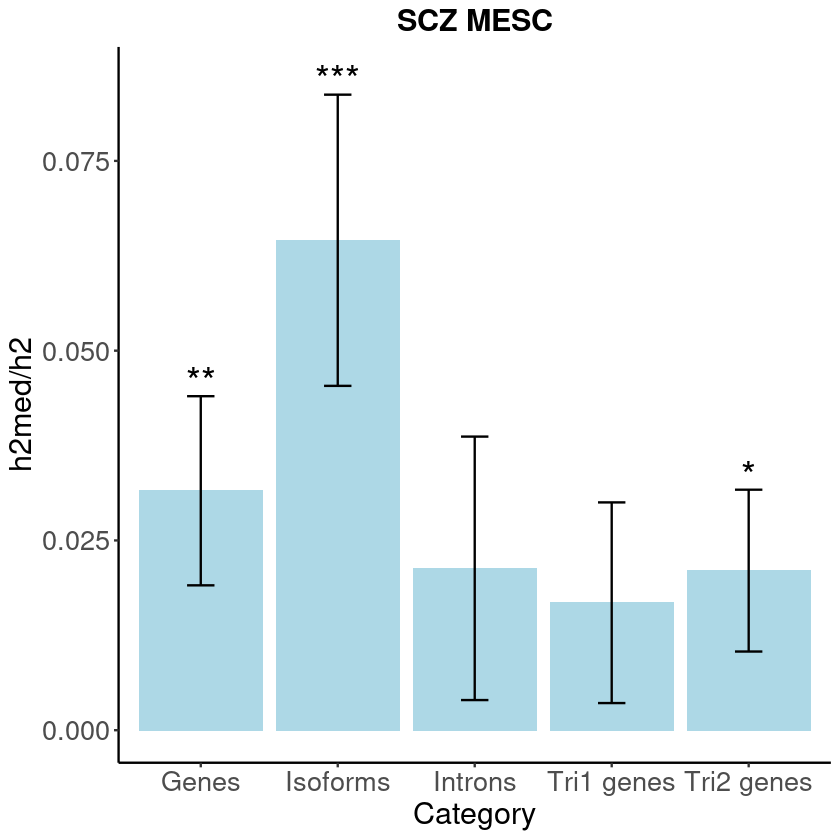

In [14]:
ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "SCZ MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_gene, label = "**", size = 8) +
    geom_text(data = signif_iso, label = "***", size = 8) +
    geom_text(data = signif_tri2, label = "*", size = 8) 

In [5]:
tri1.gene <- read.table("out/tri1_test.all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_test.all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.011025886,0.004399838,0.03154292,0.01245856,Genes,2.531826,0.0056735073
h2med,0.022719218,0.006794974,0.06454355,0.01918199,Isoforms,3.364800,0.0003829957
h2med,0.007429701,0.006103173,0.02132463,0.01735272,Introns,1.228892,0.1095560635
h2med,0.008678481,0.005568216,0.02491554,0.01597706,Tri1 genes,1.559457,0.0594440858
h2med,0.006836884,0.005047161,0.01961636,0.01442534,Tri2 genes,1.359854,0.0869379908


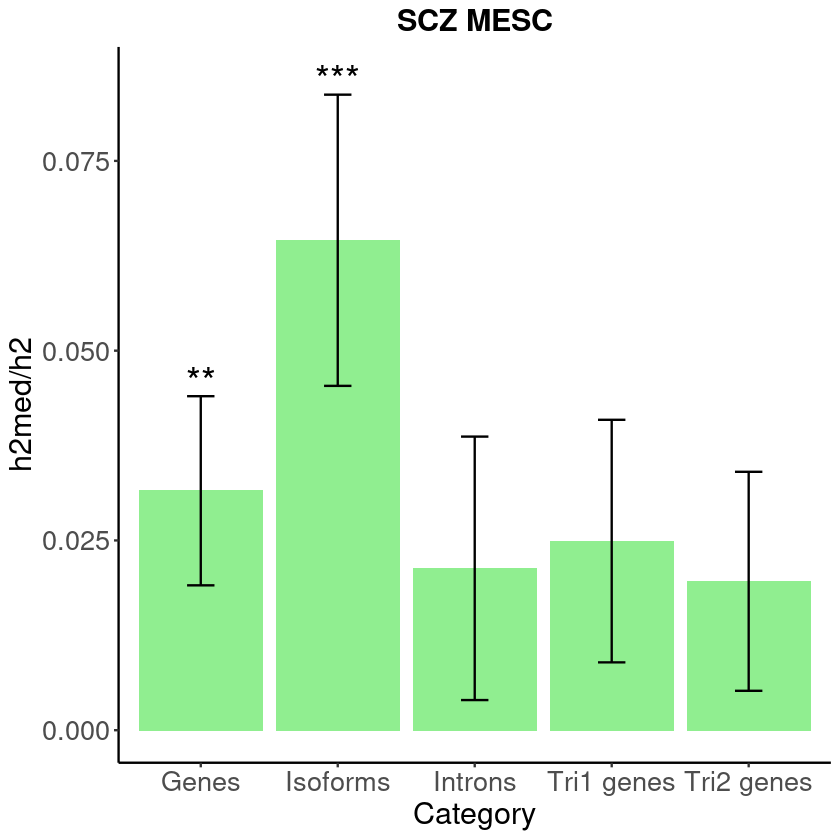

In [6]:
signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.03154292 + 0.01245856 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06454355 + 0.01918199 + 0.002)
# signif_tri2 <- data.frame("Category" = "Tri2 genes", "Estimate_over_h2" = 0.02102321 + 0.01066013 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightgreen") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "SCZ MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_gene, label = "**", size = 8) +
    geom_text(data = signif_iso, label = "***", size = 8)

In [15]:
all.gene <- read.table("out/all.gene.pgc-bip2021-all.all.h2med", header = T)
all.iso <- read.table("out/all.iso.pgc-bip2021-all.all.h2med", header = T)
all.intron <- read.table("out/all.intron.pgc-bip2021-all.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.pgc-bip2021-all.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.pgc-bip2021-all.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.0007014067,0.0008627594,0.01079286,0.01326201,Genes,0.8138175,0.2078747487
h2med,0.0048968031,0.0014389547,0.07425808,0.02184917,Isoforms,3.3986688,0.0003385733
h2med,0.0016422081,0.0014468645,0.02518420,0.02220703,Introns,1.1340640,0.1283838518
h2med,0.0014132111,0.0010918824,0.02165742,0.01662512,Tri1 genes,1.3026925,0.0963398897
h2med,0.0008886461,0.0008445029,0.01363571,0.01290314,Tri2 genes,1.0567746,0.1453072335


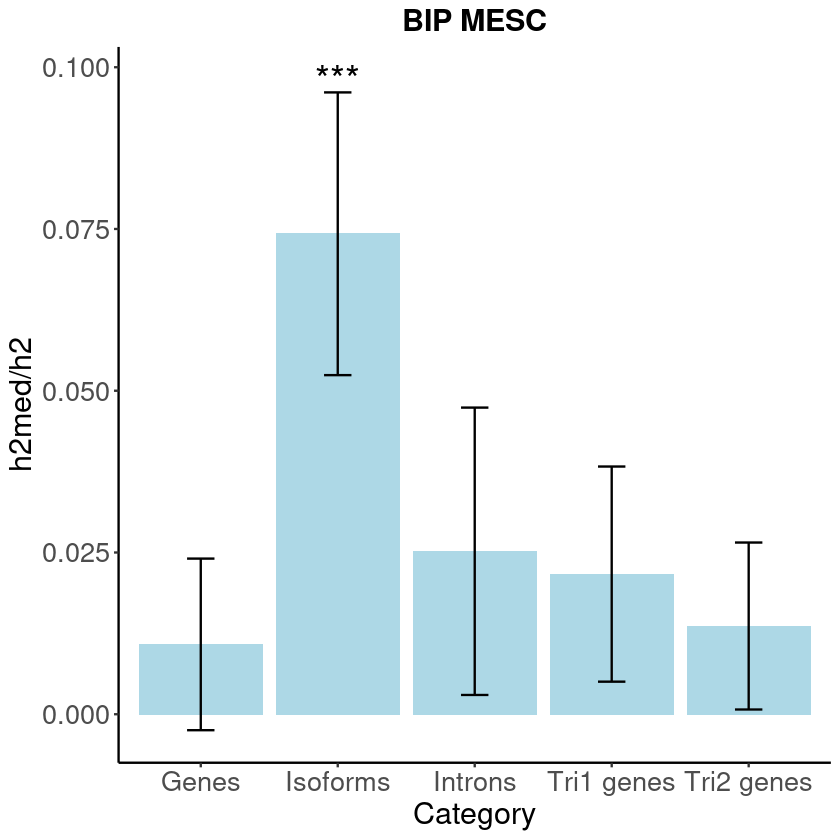

In [16]:
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.07425808 + 0.02184917 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "BIP MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_iso, label = "***", size = 8)

In [17]:
all.gene <- read.table("out/all.gene.ASD.iPSYCHPGC.2018.all.h2med", header = T)
all.iso <- read.table("out/all.iso.ASD.iPSYCHPGC.2018.all.h2med", header = T)
all.intron <- read.table("out/all.intron.ASD.iPSYCHPGC.2018.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.ASD.iPSYCHPGC.2018.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.ASD.iPSYCHPGC.2018.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,-0.0007415497,0.004465147,-0.004320356,0.02640153,Genes,-0.1636404,0.56499287
h2med,0.0131521723,0.007623326,0.075269002,0.04559655,Isoforms,1.6507610,0.04939369
h2med,0.0021910372,0.007096863,0.012621278,0.04090152,Introns,0.3085772,0.37882157
h2med,0.0067813660,0.005828357,0.038824876,0.03268997,Tri1 genes,1.1876694,0.11748184
h2med,0.0063859657,0.004459034,0.036496221,0.02495324,Tri2 genes,1.4625843,0.07179059


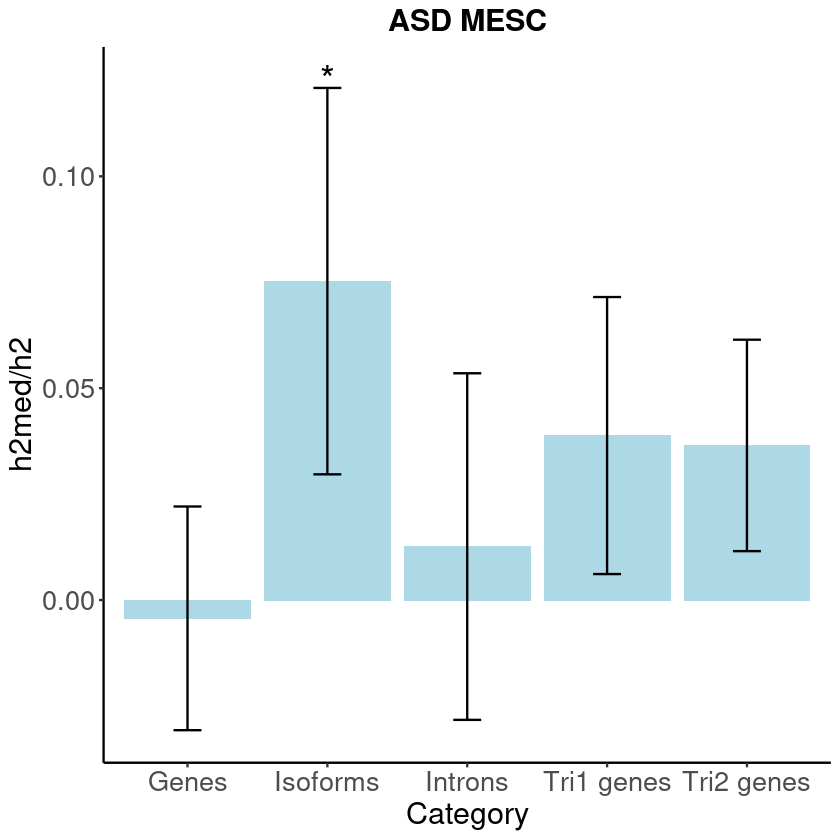

In [19]:
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.075269002 + 0.04559655 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "ASD MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_iso, label = "*", size = 8)

In [20]:
all.gene <- read.table("out/all.gene.ADHD.Demontis.2019.all.h2med", header = T)
all.iso <- read.table("out/all.iso.ADHD.Demontis.2019.all.h2med", header = T)
all.intron <- read.table("out/all.intron.ADHD.Demontis.2019.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.ADHD.Demontis.2019.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.ADHD.Demontis.2019.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.0021882492,0.004752786,0.0084815630,0.01840395,Genes,0.46085547,0.3224511
h2med,0.0170039046,0.009315640,0.0648149726,0.03492377,Isoforms,1.85589862,0.0317340
h2med,0.0035041091,0.008283944,0.0135129098,0.03193969,Introns,0.42307581,0.3361200
h2med,-0.0001206215,0.005290498,-0.0004680326,0.02056465,Tri1 genes,-0.02275908,0.5090788
h2med,0.0054615678,0.004881464,0.0210031366,0.01867761,Tri2 genes,1.12450861,0.1303987


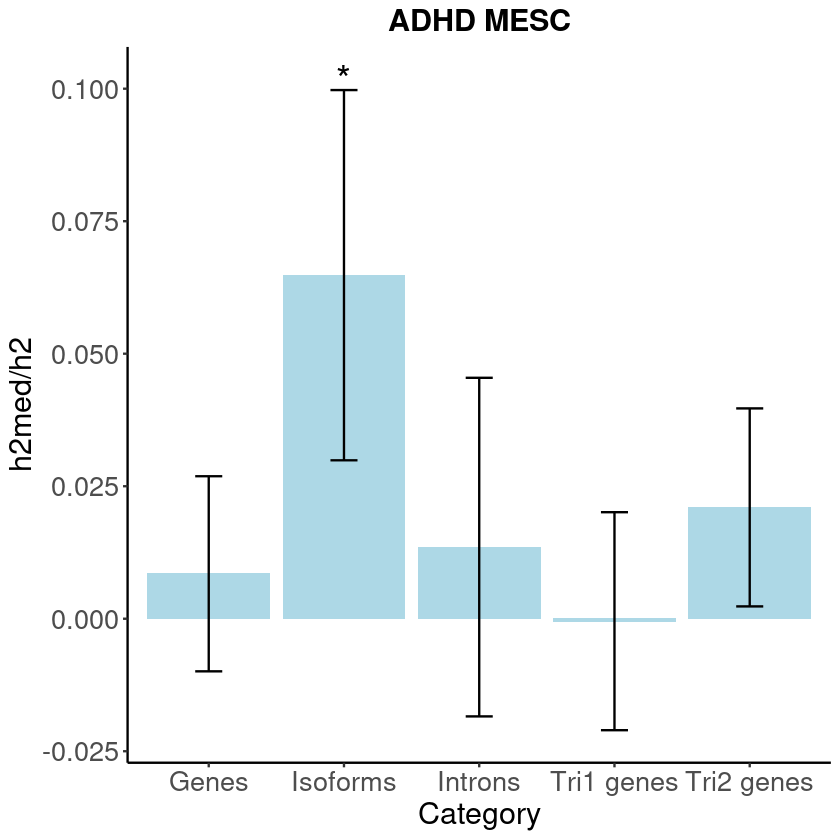

In [21]:
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.0648149726 + 0.03492377 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "ADHD MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_iso, label = "*", size = 8)

In [22]:
all.gene <- read.table("out/all.gene.MDD.Howard.PGC.2019.all.h2med", header = T)
all.iso <- read.table("out/all.iso.MDD.Howard.PGC.2019.all.h2med", header = T)
all.intron <- read.table("out/all.intron.MDD.Howard.PGC.2019.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.MDD.Howard.PGC.2019.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.MDD.Howard.PGC.2019.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.0001032448,0.0004874134,0.001738368,0.008204192,Genes,0.2118877,0.41609731
h2med,0.0015566052,0.0008576416,0.026024210,0.014293550,Isoforms,1.8206960,0.03432654
h2med,0.0021879554,0.0010172614,0.036526296,0.016961739,Introns,2.1534522,0.01564158
h2med,0.0008801396,0.0005919555,0.014766266,0.009914497,Tri1 genes,1.4893611,0.06819615
h2med,0.0002631986,0.0004434654,0.004421875,0.007452219,Tri2 genes,0.5933636,0.27646892


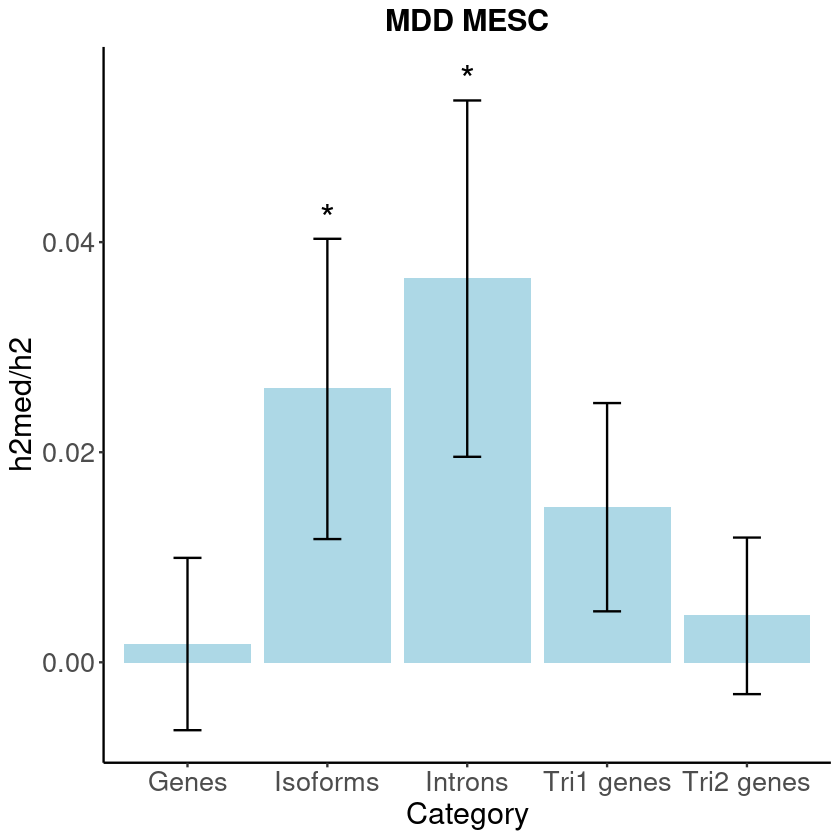

In [24]:
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.026024210 + 0.014293550 + 0.002)
signif_intron <- data.frame("Category" = "Introns", "Estimate_over_h2" = 0.036526296 + 0.016961739 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "MDD MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_iso, label = "*", size = 8) +
    geom_text(data = signif_intron, label = "*", size = 8)

In [25]:
all.gene <- read.table("out/all.gene.Intelligence.SavageNatGen.2018.all.h2med", header = T)
all.iso <- read.table("out/all.iso.Intelligence.SavageNatGen.2018.all.h2med", header = T)
all.intron <- read.table("out/all.intron.Intelligence.SavageNatGen.2018.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.Intelligence.SavageNatGen.2018.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.Intelligence.SavageNatGen.2018.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.002437104,0.001866602,0.01304472,0.009937167,Genes,1.312721,0.0946385695
h2med,0.012214762,0.003675684,0.06472102,0.019249031,Isoforms,3.362300,0.0003864804
h2med,0.008388697,0.002997284,0.04464178,0.015813686,Introns,2.822984,0.0023789482
h2med,0.005162566,0.001917837,0.02756718,0.010167088,Tri1 genes,2.711413,0.0033498531
h2med,0.004188009,0.001635511,0.02233607,0.008648398,Tri2 genes,2.582683,0.0049017702


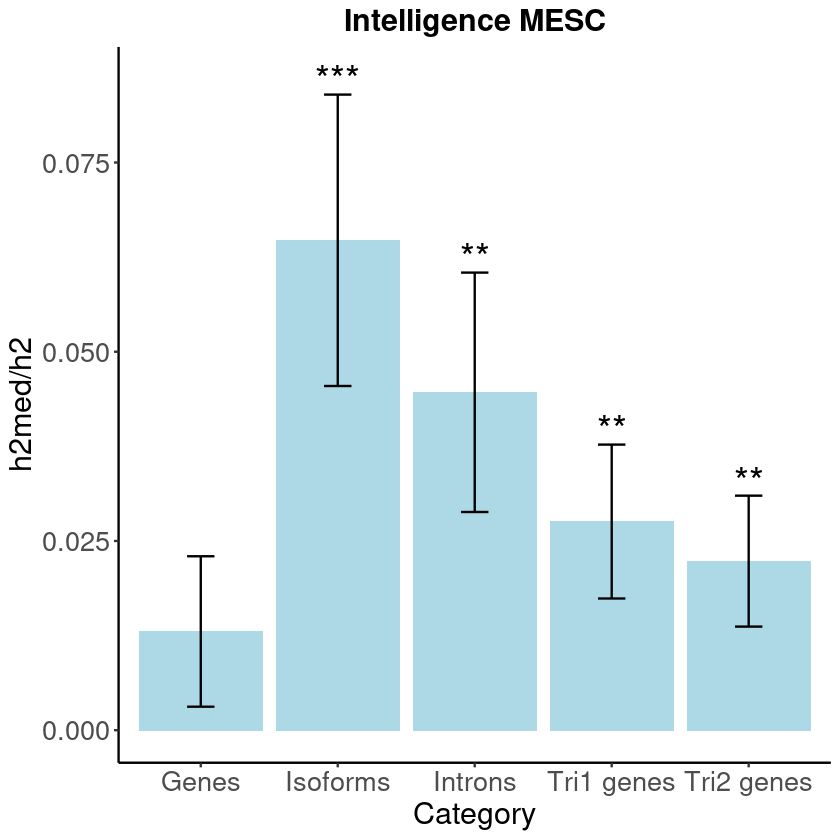

In [26]:
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06472102 + 0.019249031 + 0.002)
signif_intron <- data.frame("Category" = "Introns", "Estimate_over_h2" = 0.04464178 + 0.015813686 + 0.002)
signif_tri1 <- data.frame("Category" = "Tri1 genes", "Estimate_over_h2" = 0.02756718 + 0.010167088 + 0.002)
signif_tri2 <- data.frame("Category" = "Tri2 genes", "Estimate_over_h2" = 0.02233607 + 0.008648398 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "Intelligence MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_iso, label = "***", size = 8) +
    geom_text(data = signif_intron, label = "**", size = 8) +
    geom_text(data = signif_tri1, label = "**", size = 8) +
    geom_text(data = signif_tri2, label = "**", size = 8)

In [27]:
all.gene <- read.table("out/all.gene.EduYears.SSGAC.Lee2018.all.h2med", header = T)
all.iso <- read.table("out/all.iso.EduYears.SSGAC.Lee2018.all.h2med", header = T)
all.intron <- read.table("out/all.intron.EduYears.SSGAC.Lee2018.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.EduYears.SSGAC.Lee2018.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.EduYears.SSGAC.Lee2018.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.001658661,0.0008429245,0.01469636,0.007366992,Genes,1.994893,2.302726e-02
h2med,0.007024808,0.0017887267,0.06161301,0.015231908,Isoforms,4.044996,2.616197e-05
h2med,0.003700233,0.0016891234,0.03265185,0.014757449,Introns,2.212568,1.346374e-02
h2med,0.002899066,0.0010076794,0.02563437,0.008740141,Tri1 genes,2.932947,1.678806e-03
h2med,0.001398811,0.0007186329,0.01237570,0.006305552,Tri2 genes,1.962667,2.484247e-02


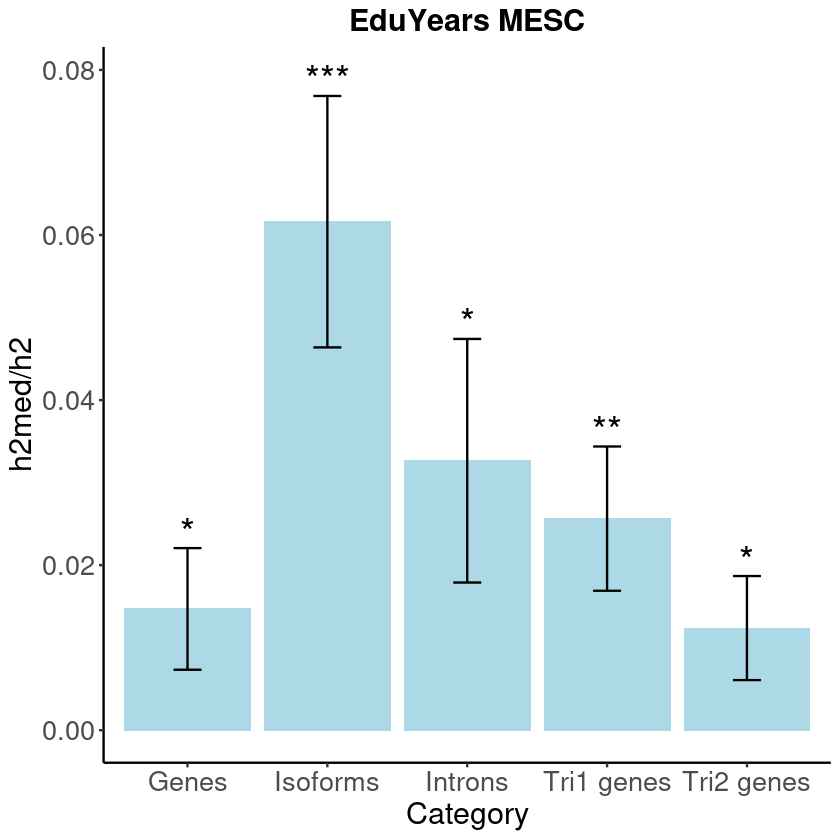

In [29]:
signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.01469636 + 0.007366992 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06161301 + 0.015231908 + 0.002)
signif_intron <- data.frame("Category" = "Introns", "Estimate_over_h2" = 0.03265185 + 0.014757449 + 0.002)
signif_tri1 <- data.frame("Category" = "Tri1 genes", "Estimate_over_h2" = 0.02563437 + 0.008740141 + 0.002)
signif_tri2 <- data.frame("Category" = "Tri2 genes", "Estimate_over_h2" = 0.01237570 + 0.006305552 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "EduYears MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    geom_text(data = signif_gene, label = "*", size = 8) +
    geom_text(data = signif_iso, label = "***", size = 8) +
    geom_text(data = signif_intron, label = "*", size = 8) +
    geom_text(data = signif_tri1, label = "**", size = 8) +
    geom_text(data = signif_tri2, label = "*", size = 8)

In [30]:
all.gene <- read.table("out/all.gene.ALZ.Jansen.2019.all.h2med", header = T)
all.iso <- read.table("out/all.iso.ALZ.Jansen.2019.all.h2med", header = T)
all.intron <- read.table("out/all.intron.ALZ.Jansen.2019.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.ALZ.Jansen.2019.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.ALZ.Jansen.2019.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.0010137791,0.0006364299,0.06672991,0.04172529,Genes,1.5992678,0.05488056
h2med,0.0020593608,0.0013215017,0.13227243,0.08404825,Isoforms,1.5737679,0.05777056
h2med,0.0007966934,0.0010945432,0.05197551,0.07144331,Introns,0.7275071,0.23345769
h2med,0.0024414901,0.0013799813,0.15474010,0.08458416,Tri1 genes,1.8294217,0.03366823
h2med,0.0011745441,0.0008820148,0.07576989,0.05636468,Tri2 genes,1.3442796,0.08942899


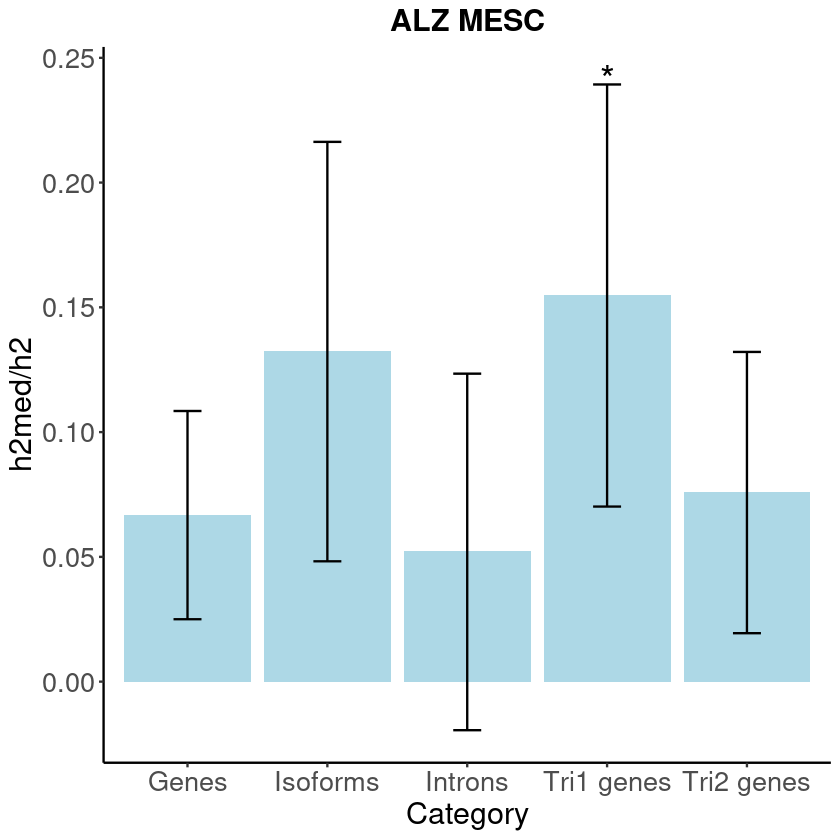

In [33]:
# signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.01469636 + 0.007366992 + 0.002)
# signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06161301 + 0.015231908 + 0.002)
# signif_intron <- data.frame("Category" = "Introns", "Estimate_over_h2" = 0.03265185 + 0.014757449 + 0.002)
signif_tri1 <- data.frame("Category" = "Tri1 genes", "Estimate_over_h2" = 0.15474010 + 0.08458416 + 0.002)
# signif_tri2 <- data.frame("Category" = "Tri2 genes", "Estimate_over_h2" = 0.01237570 + 0.006305552 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "ALZ MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
#     geom_text(data = signif_gene, label = "*", size = 8) +
#     geom_text(data = signif_iso, label = "***", size = 8) +
#     geom_text(data = signif_intron, label = "*", size = 8) +
    geom_text(data = signif_tri1, label = "*", size = 8) 
#     geom_text(data = signif_tri2, label = "*", size = 8)

In [34]:
all.gene <- read.table("out/all.gene.Insomnia.Jansen.2018.all.h2med", header = T)
all.iso <- read.table("out/all.iso.Insomnia.Jansen.2018.all.h2med", header = T)
all.intron <- read.table("out/all.intron.Insomnia.Jansen.2018.all.h2med", header = T)
tri1.gene <- read.table("out/tri1_25HCP.all.gene.Insomnia.Jansen.2018.all.h2med", header = T)
tri2.gene <- read.table("out/tri2_15HCP.all.gene.Insomnia.Jansen.2018.all.h2med", header = T)
df <- rbind(all.gene, all.iso, all.intron, tri1.gene, tri2.gene)
df <- df %>% filter(Quantity == "h2med")
df$Category <- c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns", "Tri1 genes", "Tri2 genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,-1.307952e-05,0.0005987392,-0.0003121602,0.01431040,Genes,-0.02181351,0.508701643
h2med,2.428283e-03,0.0011108689,0.0571819025,0.02629469,Isoforms,2.17465571,0.014827963
h2med,2.020242e-03,0.0011457614,0.0475638593,0.02655135,Introns,1.79139125,0.036615266
h2med,1.229321e-03,0.0007596400,0.0290847268,0.01780090,Tri1 genes,1.63389088,0.051140883
h2med,1.445750e-03,0.0005887952,0.0340017632,0.01384398,Tri2 genes,2.45606860,0.007023317


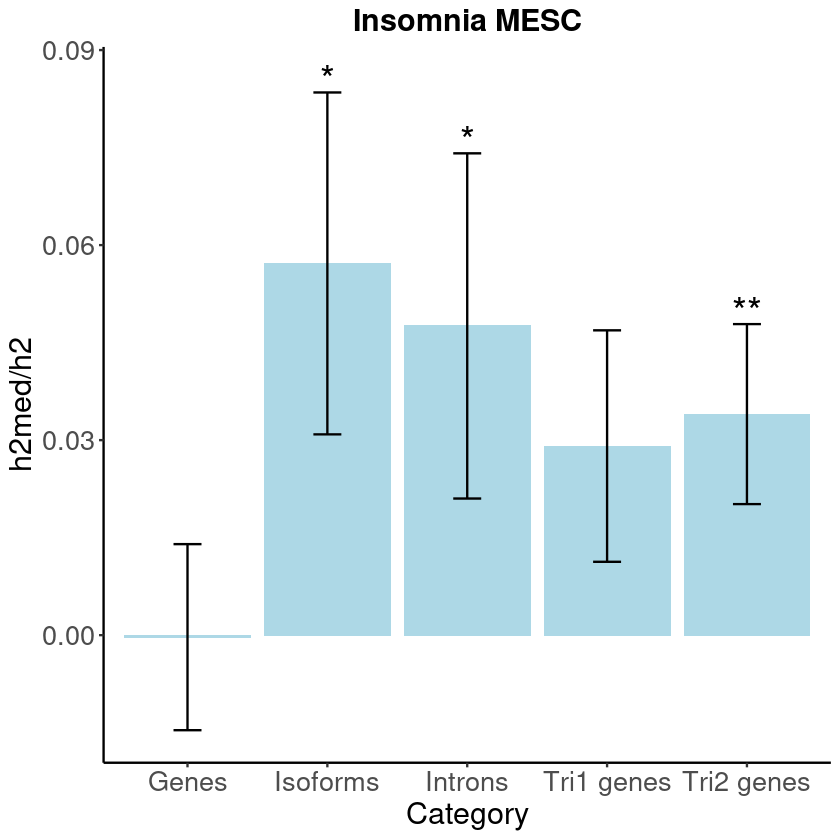

In [35]:
# signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.01469636 + 0.007366992 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.0571819025 + 0.02629469 + 0.002)
signif_intron <- data.frame("Category" = "Introns", "Estimate_over_h2" = 0.0475638593 + 0.02655135 + 0.002)
# signif_tri1 <- data.frame("Category" = "Tri1 genes", "Estimate_over_h2" = 0.02563437 + 0.008740141 + 0.002)
signif_tri2 <- data.frame("Category" = "Tri2 genes", "Estimate_over_h2" = 0.0340017632 + 0.01384398 + 0.002)

ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "lightblue") +
#     scale_color_manual(values = colors) +
#     scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = 0.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2", 
         title = "Insomnia MESC") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
#     geom_text(data = signif_gene, label = "*", size = 8) +
    geom_text(data = signif_iso, label = "*", size = 8) +
    geom_text(data = signif_intron, label = "*", size = 8) +
#     geom_text(data = signif_tri1, label = "**", size = 8) +
    geom_text(data = signif_tri2, label = "**", size = 8)